<a href="https://colab.research.google.com/github/pardeshiaarti/Computer-Fundamentals/blob/main/DBSCANDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

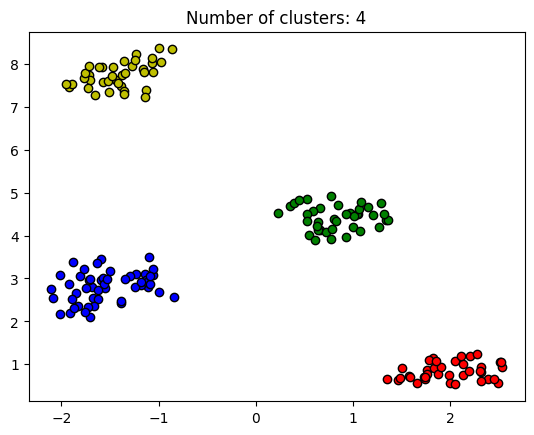

Silhouette Coefficient: 0.13
Adjusted Rand Index: 0.31


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score  # <-- Added import for ARI

# Load data in X
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.50, random_state=0)

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plot result
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'  # Black for noise

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Number of clusters: %d' % n_clusters_)
plt.show()

# Evaluation metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient: %0.2f" % sc)

ari = adjusted_rand_score(y_true, labels)  # Corrected ARI usage
print("Adjusted Rand Index: %0.2f" % ari)


Evaluation Metrics For DBSCAN Algorithm In Machine Learning

The Silhouette score and Adjusted rand score for evaluating clustering algorithms.

Silhouette’s score is in the range of -1 to 1.
A score near 1 denotes the best meaning that the data point i is very compact within the cluster to which it belongs and far away from the other clusters.

The worst value is -1.

Values near 0 denote overlapping clusters.

Absolute Rand Score is in the range of 0 to 1. More than 0.9 denotes excellent cluster recovery, and above 0.8 is a good recovery. Less than 0.5 is considered to be poor recovery.